# Country Distances 
This notebook objective is to create distance matrix between all the countries in the world : 
1. A Distance matrix in lat-long : DONE - Pickle + STD
2. An Adjacency matrix based on the physical borders : DONE 
3. A Distance matrix in number of hops (by the way of an adjacency matrix : DONE - Pickle + STD
4. A Neigbhor influence matrix : DONE - Pickle
5. A Distance Matrix based on the number of flight routes between countries : DONE - Pickle + STD

In [1]:
%pylab inline
import pandas as pd
import networkx as nx
import numpy as np 
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


## 1 -  Distance matrix 
As we know the avare coordinate of every country, we can set un a distance matrix between every country. We just have to be carefull with the extreme values of longitude as the earth is round. 

In [2]:
c_data = pickle.load(open('../DataEnriching/data.pickle','rb'))
c_data.drop(c_data.index[231],inplace=True)

In [3]:
c_latlng = np.array(c_data['latlng'])

In [4]:
c_distance = np.zeros([len(c_latlng),len(c_latlng)])
for i in range(len(c_latlng)):
    for j in range(len(c_latlng)):
        try:
            vect_ij = np.array(c_latlng[i])  -  np.array(c_latlng[j])
            # Handling the fact that the earth in round
            vect_ij[1] = min(abs(vect_ij[1]),abs( vect_ij[1]+360 ), abs(vect_ij[1] - 360))
            c_distance[i,j] = np.linalg.norm(vect_ij)
        except:
            print(i,j)
            c_distance[i,j] = np.nan


In [5]:
def stand(mymat):
    myshape = np.shape(mymat)
    std_scaler = StandardScaler().fit(np.array(mymat).reshape(-1, 1))
    return std_scaler.transform(np.array(mymat).reshape(-1, 1)).reshape(myshape)

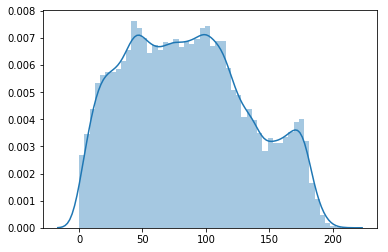

In [6]:
sns.distplot(c_distance.flatten())

c_distance_std = stand(c_distance)

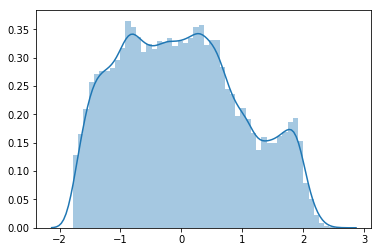

In [7]:
sns.distplot(c_distance_std.flatten())


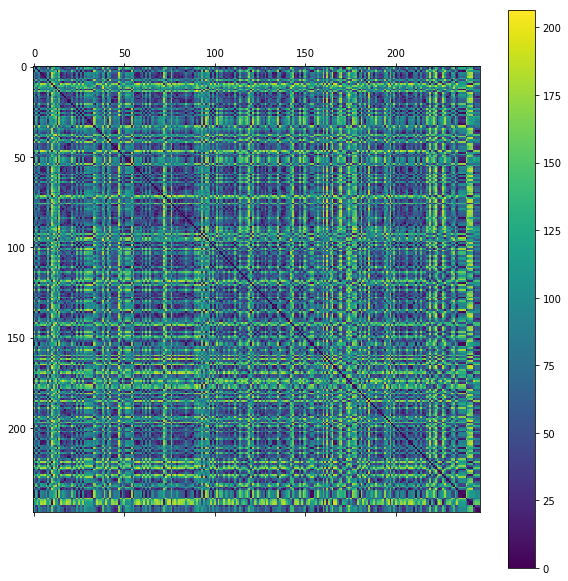

real_distance                                                  \
                AW          AF          AO          AI          AX   
ISO2                                                                 
AW        0.000000  136.514655   91.931230    8.905195  101.702334   
AF      136.514655    0.000000   65.057667  129.012623   52.624363   
AO       91.931230   65.057667    0.000000   87.264007   72.630161   
AI        8.905195  129.012623   87.264007    0.000000   93.020906   
AX      101.702334   52.624363   72.630161   93.020906    0.000000   
AL       94.372936   45.705580   53.521024   86.222137   19.116929   
AD       77.507964   64.206697   57.567352   69.064030   25.473652   
AE      124.498934   14.212670   50.916598  117.307674   49.671155   
AR       46.881245  145.361618   85.255498   52.256645  126.083928   
AM      118.209917   21.189620   58.809013  110.331728   32.166602   
AS      103.569762  133.661679  171.509799  111.691695  185.679327   
AQ      124.103120  139.118654   79.677475  125.331920  151.429930   
TF      152.221023   82.355488   62.591592  148.554533  119.951262   
AG        9.348633  127.799227   85.564552    1.818730   92.355984   
AU      161.925038   90.686272  115.414470  169.967419  142.761772   
AT       90.289817   53.617990   60.055992   81.841861   14.371316   
AZ      120.757682   19.039433   60.415230  112.881237   33.861093   
BI      101.238997   50.569259   14.603082   95.671784   64.413433   
BE       83.309737   63.553346   64.972003   74.652761   18.411689   
BJ       72.278952   67.006063   27.350731   65.999263   53.605685   
BF       67.968506   69.921384   32.718496   61.391560   51.957582   
BD      160.379501   26.570661   80.277643  153.274558   78.856982   
BG       99.744262   41.231056   55.879334   91.574689   17.860299   
BH      121.270429   16.056229   50.094436  113.980449   45.862506   
BS       13.208467  141.271237  101.394342   14.166667  102.387635   
BA       93.436526   48.270074   56.502212   85.153334   16.228276   
BL        8.882708  129.232698   87.586188    0.353553   93.132239   
BY      106.008102   42.059482   66.185346   97.564971   10.782252   
BZ       19.374625  154.554602  111.299708   25.602870  116.800572   
BM       20.507919  129.751713   94.554695   14.172058   89.092851   
...            ...         ...         ...         ...         ...   
TH      169.985052   39.357337   86.014534  163.199031   91.932169   
TJ      143.435878    8.485281   73.542505  135.761765   55.291262   
TK      104.273923  129.973074  169.536132  112.192945  181.754570   
TM      132.844211    8.602325   66.921596  125.072340   44.863017   
TL      165.497406   73.897686  107.479229  173.049166  126.465949   
TO      109.946583  131.183078  166.668833  118.193726  183.512099   
TT        9.091266  127.906216   82.900543    7.566832   94.642786   
TN       81.841215   56.008928   47.460510   73.865352   28.300005   
TR      108.260109   30.594117   54.078646  100.335721   25.960039   
TV      113.893449  120.208153  159.563467  121.698084  172.149616   
TW      169.390873   56.800088  108.638161  175.911693  107.526696   
TZ      106.584479   49.203658   17.734148  101.117540   67.819051   
UG      102.613114   45.967380   19.091883   96.717408   60.342276   
UA      108.302591   36.674242   62.964276  100.011284   16.431381   
UY       47.595355  137.829605   77.269011   51.748658  120.131277   
US       37.162496  162.077142  126.057527   39.175974  118.973766   
UZ      136.964659    8.062258   70.231759  129.185617   48.065132   
VA       87.503525   53.298335   54.735386   79.228800   19.681196   
VC        8.798690  127.736066   83.756507    5.372874   93.668001   
VE        5.998704  133.364163   86.951136   10.634391  100.473663   
VG        7.983454  130.439180   88.691555    1.467635   94.243349   
VI        7.717315  130.756619   88.954165    1.769494   94.557648   
VN      177.837804   46.022338   93.820159  171.012690   98.305003   
VU      126.291

In [8]:
plt.figure(num=1,figsize=[10,10])
plt.matshow(c_distance,fignum=1)
plt.colorbar()
plt.show()

real_distance_std_df = pd.DataFrame(c_distance_std,columns=[c_data['ISO2']], index = c_data['ISO2'])
real_distance_std_df.columns=pd.MultiIndex.from_tuples([('real_distance',c_data['ISO2'].iloc[i]) for i in range(len(c_data))])
real_distance_std_df.to_pickle('real_distance_std.pickle')
real_distance_std_df

real_distance_df = pd.DataFrame(c_distance,columns=[c_data['ISO2']], index = c_data['ISO2'])
real_distance_df.columns=pd.MultiIndex.from_tuples([('real_distance',c_data['ISO2'].iloc[i]) for i in range(len(c_data))])
real_distance_df.to_pickle('real_distance.pickle')
real_distance_df


## 2 - Adjacency Matrix
Here establish an adjacency matrix of the connected countries in term of borders (the only problem is that it won't be fully connected as Islands would stay alone. This is a usefull tool to create afterwards an neigborhood influence matrix. 

In [9]:
c_adj = np.zeros([len(c_data),len(c_data)])
for i in range(len(c_data)-1):
    for j in range(len(c_data)-1):
        if c_data['ISO3'].iloc[i] in set(c_data['borders'].iloc[j]) :
            c_adj[i,j] = 1
        else:
            c_adj[i,j] = 0

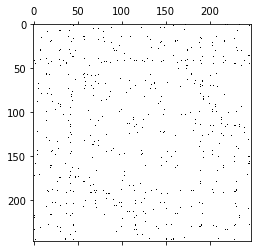

In [10]:
plt.spy(c_adj)

We wish to show the graph generated by the adjacency matrix, with the country names labels and their real coordinated (in lat/long)

In [11]:
c_pos = {}
for i in range(len(c_data)):
    c_pos[dict(c_data.reset_index()['ISO2'])[i]] = array(c_data.reset_index()['latlng'].iloc[i])[::-1]


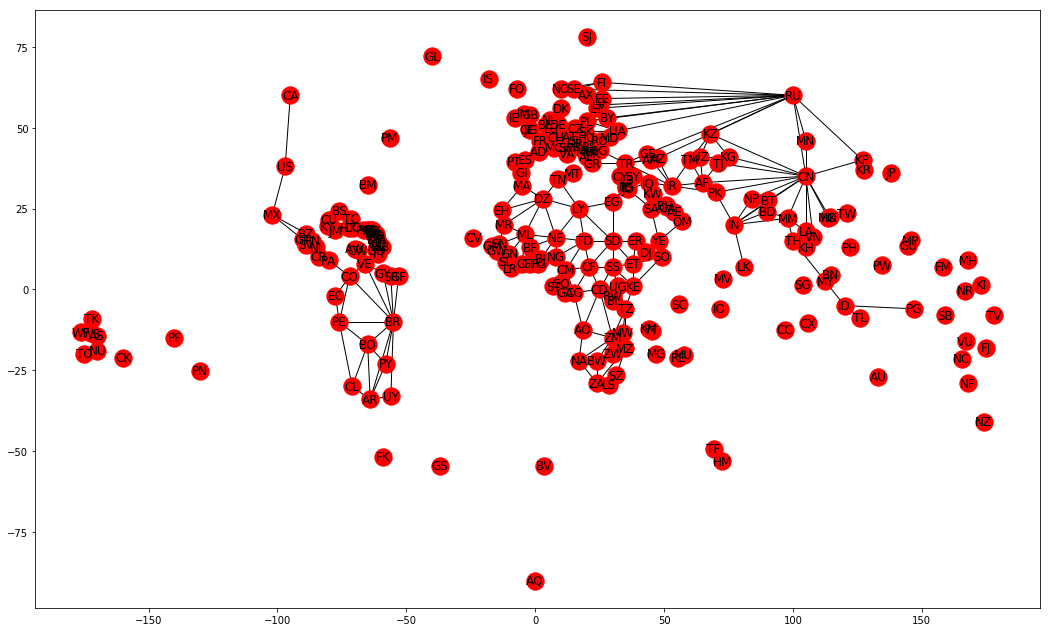

In [12]:
plt.figure(figsize=[18,11])
G = nx.Graph(c_adj)
G = nx.relabel_nodes(G,dict(c_data.reset_index()['ISO2']))
nx.draw_networkx(G,pos=c_pos) #,labels=dict(c_data.reset_index()['name'])

### 3 - Hop Matrix
Here we want find the number boders you have to cross in order to reach an other country. Here also we consider only physical borders.

In [13]:
shortest_path_c = dict(nx.all_pairs_shortest_path_length(G))
hop_matrix = np.zeros([len(c_data),len(c_data)])
hop_matrix_std = np.zeros([len(c_data),len(c_data)])

c_iso2 = dict(c_data.reset_index()['ISO2'])
raw_hops ={}

for i in range(len(c_data)):
    for j in range(len(c_data)):
        try:
            raw_hops[(i,j)] = shortest_path_c[c_iso2[i]][c_iso2[j]]
        except:
            pass


raw_hops = dict(zip(list(raw_hops.keys()),stand(np.array(list(raw_hops.values())))) )

for i in range(len(c_data)):
    for j in range(len(c_data)):
        try:
            hop_matrix[i][j] = shortest_path_c[c_iso2[i]][c_iso2[j]]
            hop_matrix_std[i][j] = raw_hops[(i,j)]
        except:
            hop_matrix[i][j] = np.inf
            hop_matrix_std[i][j] = np.inf


/Users/adrian/anaconda3/envs/ada/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
hop_matrix

array([[  0.,  inf,  inf, ...,  inf,  inf,  inf],
       [ inf,   0.,   9., ...,  11.,   9.,  inf],
       [ inf,   9.,   0., ...,   2.,   1.,  inf],
       ..., 
       [ inf,  11.,   2., ...,   0.,   2.,  inf],
       [ inf,   9.,   1., ...,   2.,   0.,  inf],
       [ inf,  inf,  inf, ...,  inf,  inf,   0.]])

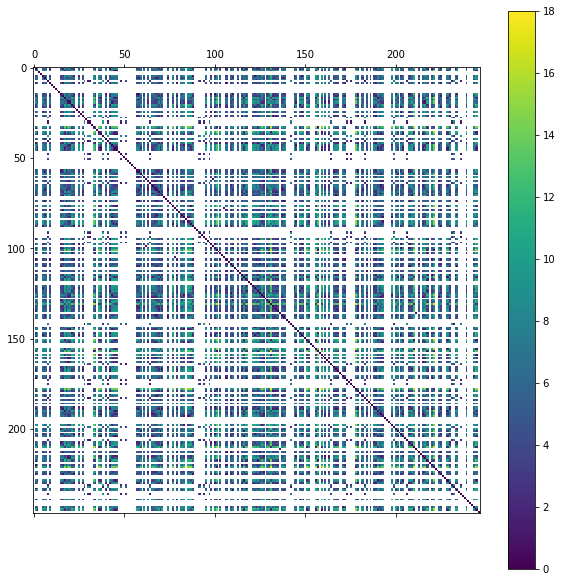

In [15]:
plt.figure(num=2,figsize=[10,10])
plt.matshow(hop_matrix,fignum=2)
plt.colorbar()
plt.show()

In [16]:
hop_distance_df = pd.DataFrame(hop_matrix,columns=[c_data['ISO2']], index = c_data['ISO2'])
hop_distance_df.columns=pd.MultiIndex.from_tuples([('hop_distance',c_data['ISO2'].iloc[i]) for i in range(len(c_data))])
hop_distance_df.to_pickle('hop_distance.pickle')
hop_distance_std_df = pd.DataFrame(hop_matrix_std,columns=[c_data['ISO2']], index = c_data['ISO2'])
hop_distance_std_df.columns=pd.MultiIndex.from_tuples([('hop_distance',c_data['ISO2'].iloc[i]) for i in range(len(c_data))])
hop_distance_std_df.to_pickle('hop_distance_std.pickle')

hop_distance_df


hop_distance                                                       \
               AW         AF         AO        AI        AX         AL   
ISO2                                                                     
AW       0.000000        inf        inf       inf       inf        inf   
AF            inf   0.000000   9.000000       inf       inf   4.000000   
AO            inf   9.000000   0.000000       inf       inf   9.000000   
AI            inf        inf        inf  0.000000       inf        inf   
AX            inf        inf        inf       inf  0.000000        inf   
AL            inf   4.000000   9.000000       inf       inf   0.000000   
AD            inf   6.000000   8.000000       inf       inf   6.000000   
AE            inf   4.000000   8.000000       inf       inf   5.000000   
AR            inf        inf        inf       inf       inf        inf   
AM            inf   2.000000   8.000000       inf       inf   3.000000   
AS            inf        inf        inf       inf       inf        inf   
AQ            inf        inf        inf       inf       inf        inf   
TF            inf        inf        inf       inf       inf        inf   
AG            inf        inf        inf       inf       inf        inf   
AU            inf        inf        inf       inf       inf        inf   
AT            inf   5.000000  10.000000       inf       inf   4.000000   
AZ            inf   2.000000   8.000000       inf       inf   3.000000   
BI            inf   9.000000   2.000000       inf       inf   9.000000   
BE            inf   5.000000   9.000000       inf       inf   6.000000   
BJ            inf   8.000000   4.000000       inf       inf   8.000000   
BF            inf   8.000000   5.000000       inf       inf   8.000000   
BD            inf   3.000000  11.000000       inf       inf   6.000000   
BG            inf   3.000000   8.000000       inf       inf   2.000000   
BH            inf        inf        inf       inf       inf        inf   
BS            inf        inf        inf       inf       inf        inf   
BA            inf   5.000000  10.000000       inf       inf   2.000000   
BL            inf        inf        inf       inf       inf        inf   
BY            inf   3.000000  10.000000       inf       inf   5.000000   
BZ            inf        inf        inf       inf       inf        inf   
BM            inf        inf        inf       inf       inf        inf   
...           ...        ...        ...       ...       ...        ...   
TH            inf   3.000000  12.000000       inf       inf   7.000000   
TJ            inf   1.000000  10.000000       inf       inf   5.000000   
TK            inf        inf        inf       inf       inf        inf   
TM            inf   1.000000   9.000000       inf       inf   4.000000   
TL            inf   6.000000  15.000000       inf       inf  10.000000   
TO            inf        inf        inf       inf       inf        inf   
TT            inf        inf        inf       inf       inf        inf   
TN            inf   7.000000   5.000000       inf       inf   7.000000   
TR            inf   2.000000   7.000000       inf       inf   2.000000   
TV            inf        inf        inf       inf       inf        inf   
TW            inf        inf        inf       inf       inf        inf   
TZ            inf   9.000000   2.000000       inf       inf   9.000000   
UG            inf   8.000000   2.000000       inf       inf   8.000000   
UA            inf   3.000000  10.000000       inf       inf   4.000000   
UY            inf        inf        inf       inf       inf        inf   
US            inf        inf        inf       inf       inf        inf   
UZ            inf   1.000000  10.000000       inf       inf   5.000000   
VA            inf   7.000000  10.000000       inf       inf   5.000000   
VC            inf        inf        inf       inf       inf        inf   
VE            inf        inf        inf       inf       inf        inf   
VG       

## 4.1 - Influence matrix 
We are going to weight the the adjacency matrix by the size of the country 

In [17]:
c_adj_df = pd.DataFrame(c_adj,index=c_data['ISO2'],columns=c_data['ISO2'])
c_data_iso2 = c_data.reset_index().set_index(c_data.ISO2)

In [18]:
neighbor_influence_matrix = pd.DataFrame(index=c_data['ISO2'],columns=c_data['ISO2'])
for i in range(len(c_data)):
    c_i = c_data['ISO2'].iloc[i]
    for j in range(len(c_data)):
        c_j = c_data['ISO2'].iloc[j]
        neighbor_influence_matrix.loc[c_i,c_j] = c_adj_df.loc[c_i,c_j]* ( c_data_iso2['area'].loc[c_j]/c_data_iso2['area'].loc[c_i])

neighbor_influence_matrix.columns = pd.MultiIndex.from_tuples([('neighbor_influence',c_data['ISO2'].iloc[i]) for i in range(len(c_data))])
neighbor_influence_matrix.to_pickle('neighbor_influence.pickle')
neighbor_influence_matrix

neighbor_influence                                                      \
                     AW       AF      AO AI AX AL AD AE       AR         AM   
ISO2                                                                          
AW                    0        0       0  0  0  0  0  0        0          0   
AF                    0        0       0  0  0  0  0  0        0          0   
AO                    0        0       0  0  0  0  0  0        0          0   
AI                    0        0       0  0  0  0  0  0        0          0   
AX                    0        0       0  0  0  0  0  0        0          0   
AL                    0        0       0  0  0  0  0  0        0          0   
AD                    0        0       0  0  0  0  0  0        0          0   
AE                    0        0       0  0  0  0  0  0        0          0   
AR                    0        0       0  0  0  0  0  0        0          0   
AM                    0        0       0  0  0  0  0  0        0          0   
AS                    0        0       0  0  0  0  0  0        0          0   
AQ                    0        0       0  0  0  0  0  0        0          0   
TF                    0        0       0  0  0  0  0  0        0          0   
AG                    0        0       0  0  0  0  0  0        0          0   
AU                    0        0       0  0  0  0  0  0        0          0   
AT                    0        0       0  0  0  0  0  0        0          0   
AZ                    0        0       0  0  0  0  0  0        0   0.343453   
BI                    0        0       0  0  0  0  0  0        0          0   
BE                    0        0       0  0  0  0  0  0        0          0   
BJ                    0        0       0  0  0  0  0  0        0          0   
BF                    0        0       0  0  0  0  0  0        0          0   
BD                    0        0       0  0  0  0  0  0        0          0   
BG                    0        0       0  0  0  0  0  0        0          0   
BH                    0        0       0  0  0  0  0  0        0          0   
BS                    0        0       0  0  0  0  0  0        0          0   
BA                    0        0       0  0  0  0  0  0        0          0   
BL                    0        0       0  0  0  0  0  0        0          0   
BY                    0        0       0  0  0  0  0  0        0          0   
BZ                    0        0       0  0  0  0  0  0        0          0   
BM                    0        0       0  0  0  0  0  0        0          0   
...                 ...      ...     ... .. .. .. .. ..      ...        ...   
TH                    0        0       0  0  0  0  0  0        0          0   
TJ                    0  4.55786       0  0  0  0  0  0        0          0   
TK                    0        0       0  0  0  0  0  0        0          0   
TM                    0  1.33626       0  0  0  0  0  0        0          0   
TL                    0        0       0  0  0  0  0  0        0          0   
TO                    0        0       0  0  0  0  0  0        0          0   
TT                    0        0       0  0  0  0  0  0        0          0   
TN                    0        0       0  0  0  0  0  0        0          0   
TR                    0        0       0  0  0  0  0  0        0  0.0379587   
TV                    0        0       0  0  0  0  0  0        0          0   
TW                    0        0       0  0  0  0  0  0        0          0   
TZ                    0        0       0  0  0  0  0  0        0          0   
UG                    0        0       0  0  0  0  0  0        0          0   
UA                    0        0       0  0  0  0  0  0        0          0   
UY                    0        0       0  0  0  0  0  0  15.3584          0   
US                    0        0       0  0  0  0  0  0        0          0   
UZ                    0  1.45782       0  0  0  0  0  0

## 4.2 - Influence matrix - Alternative
We are going to weight the the adjacency matrix by the size of the country 

In [34]:
c_adj_df = pd.DataFrame(c_adj,index=c_data['ISO2'],columns=c_data['ISO2'])
c_data_iso2 = c_data.reset_index().set_index(c_data.ISO2)

In [37]:
neighbor_influence_matrix = pd.DataFrame(index=c_data['ISO2'],columns=c_data['ISO2'])
for i in range(len(c_data)):
    c_i = c_data['ISO2'].iloc[i]
    area_sum_i = sum( c_adj_df.loc[c_i,:]* c_data_iso2['area'])
    for j in range(len(c_data)):
        c_j = c_data['ISO2'].iloc[j]
        neighbor_influence_matrix.loc[c_i,c_j] = c_adj_df.loc[c_i,c_j]* ( c_data_iso2['area'].loc[c_j]/area_sum_i)* 100

neighbor_influence_matrix.columns = pd.MultiIndex.from_tuples([('neighbor_influence',c_data['ISO2'].iloc[i]) for i in range(len(c_data))])
neighbor_influence_matrix.to_pickle('neighbor_influence_v2.pickle')


/Users/adrian/anaconda3/envs/ada/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in double_scalars
/Users/adrian/anaconda3/envs/ada/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


In [36]:
neighbor_influence_matrix

neighbor_influence                                                 \
                     AW         AF         AO   AI   AX   AL   AD   AE   
ISO2                                                                     
AW                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AF                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AO                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AI                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AX                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AL                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AD                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AE                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AR                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AM                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AS                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AQ                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
TF                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AG                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AU                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AT                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
AZ                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
BI                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
BE                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
BJ                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
BF                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
BD                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
BG                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
BH                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
BS                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
BA                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
BL                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
BY                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
BZ                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
BM                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
...                 ...        ...        ...  ...  ...  ...  ...  ...   
TH                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
TJ                  0.0   5.925839   0.000000  0.0  0.0  0.0  0.0  0.0   
TK                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
TM                  0.0  11.917829   0.000000  0.0  0.0  0.0  0.0  0.0   
TL                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
TO                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
TT                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
TN                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
TR                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
TV                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
TW                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
TZ                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
UG                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
UA                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
UY                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
US                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
UZ                  0.0  15.498727   0.000000  0.0  0.0  0.0  0.0  0.0   
VA                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
VC                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
VE                  0.0   0.000000   0.000000  0.0  0.0  0.0  0.0  0.0   
VG       

## 5 - Distance Matrix based on the number of direct flights between countries 
We have found a dataset of 59036 routes between 3209 airports on 531 airlines in the world as of January 2012. In addition the that we are able so associate all the Airports to their country thanks to a second dataset. 

In [21]:
routes_col = ['Airline','Airline ID','Source airport','Source airport ID','Destination airport','Destination airport ID','Codeshare','Stops','Equipment']
routes = pd.read_csv('./FlightsData/routes.dat',header=None,names=routes_col)
airports_col = ['Airport ID','Name','City','Country','IATA','ICAO','Latitude','Longitude','Altitude','Timezone','DST','Tz ','Type','Source']
airports = pd.read_csv('./FlightsData/airports.dat',header=None,names=airports_col)
countries = pd.read_csv('./FlightsData/countries.dat',header=None,names=['Country','Blup','ISO2','Blop']).drop(['Blup','Blop'],axis=1)

In [22]:
airports = pd.merge(airports,countries,on='Country')
airports = airports[['IATA','ISO2']].dropna().drop(airports.ISO2 == '\\N').reset_index().drop('index',axis=1).set_index('IATA')
airports.loc[airports.ISO2 == 'IV','ISO2'] = 'CI'
airports.loc[airports.ISO2 == 'AN','ISO2'] = 'AD'

In [23]:
r_start = pd.merge(routes[['Source airport']].rename_axis({'Source airport':'IATA'},axis=1),airports.reset_index(),how="left",on='IATA')
r_end = pd.merge(routes[['Destination airport']].rename_axis({'Destination airport':'IATA'},axis=1),airports.reset_index(),how="left",on='IATA')

routes = pd.merge(r_start.rename_axis({'IATA':'s_IATA','ISO2': 's_ISO2'},axis=1),r_end.rename_axis({'IATA':'e_IATA','ISO2': 'e_ISO2'},axis=1),right_index=True,left_index=True)

In [24]:
# Droping the Nan aiports and the airport codes
routes = routes.replace('\\N',np.nan)
routes = routes.drop(['s_IATA','e_IATA'],axis=1).dropna(axis=0)
# Droping the internal flights
routes = routes.loc[routes['e_ISO2'] != routes['s_ISO2']]


In [25]:
routes_weights = routes.reset_index().groupby(['s_ISO2','e_ISO2']).count()

routes_weights['links'] = routes_weights['index']
routes_weights.drop('index',axis=1,inplace = True)

In [26]:
routes_total_dep = routes.reset_index().groupby(['s_ISO2']).count()
routes_total_dep['total_dep'] = routes_total_dep['index']
routes_total_dep.drop(['e_ISO2'],axis=1,inplace=True)
routes_weights_dep = pd.merge(routes_weights.reset_index(),routes_total_dep.reset_index(),on='s_ISO2')
routes_weights_dep = routes_weights_dep.set_index(['s_ISO2','e_ISO2']).drop('index',axis=1)
routes_weights_dep['percentage'] = 100*routes_weights_dep['links']/routes_weights_dep['total_dep']
routes_weights = routes_weights_dep[['percentage']]


In [27]:

routes_weights['standardized'] = stand(routes_weights)

/Users/adrian/anaconda3/envs/ada/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [28]:
routes_weights

percentage  standardized
s_ISO2 e_ISO2                          
AD     AG        1.190476     -0.396152
       AI        2.380952     -0.272429
       AW        4.761905     -0.024982
       BB        1.190476     -0.396152
       CA        1.190476     -0.396152
       CO        2.380952     -0.272429
       DE        1.190476     -0.396152
       DM        5.952381      0.098741
       DO        7.142857      0.222465
       FR        8.333333      0.346188
       GP        1.190476     -0.396152
       HT        1.190476     -0.396152
       JM        2.380952     -0.272429
       KN        3.571429     -0.148706
       LC        1.190476     -0.396152
       NL        4.761905     -0.024982
       PA        2.380952     -0.272429
       PR        3.571429     -0.148706
       SR        1.190476     -0.396152
       TT        3.571429     -0.148706
       US       27.380952      2.325763
       VE        7.142857      0.222465
       VG        4.761905     -0.024982
AE     AF        0.970874     -0.418975
       AM        0.277393     -0.491047
       AO        0.277393     -0.491047
       AT        0.277393     -0.491047
       AU        2.219140     -0.289246
       AZ        0.277393     -0.491047
       BD        1.386963     -0.375732
...                   ...           ...
ZA     RW        1.459854     -0.368157
       SA        0.729927     -0.444016
       SC        1.459854     -0.368157
       SG        2.919708     -0.216437
       SN        2.189781     -0.292297
       SZ        0.729927     -0.444016
       TH        1.459854     -0.368157
       TR        0.729927     -0.444016
       TZ        1.459854     -0.368157
       UG        0.729927     -0.444016
       US        3.649635     -0.140578
       ZM        5.109489      0.011142
       ZW        6.569343      0.162861
ZM     AE        2.564103     -0.253395
       AO        2.564103     -0.253395
       BW        2.564103     -0.253395
       CD        5.128205      0.013087
       ET        5.128205      0.013087
       KE       15.384615      1.079012
       MW       15.384615      1.079012
       NL        7.692308      0.279568
       ZA       17.948718      1.345493
       ZW       25.641026      2.144937
ZW     BW        6.896552      0.196867
       ET        6.896552      0.196867
       KE       10.344828      0.555238
       MW        3.448276     -0.161504
       TZ        3.448276     -0.161504
       ZA       31.034483      2.705466
       ZM       37.931034      3.422209

[4378 rows x 2 columns]

In [29]:
routes_matrix = pd.DataFrame(index=c_data['ISO2'],columns=c_data['ISO2'])
for i in range(len(c_data)):
    c_i = c_data['ISO2'].iloc[i]
    for j in range(len(c_data)):
        c_j = c_data['ISO2'].iloc[j]
        try:
            routes_matrix.loc[c_i,c_j] = routes_weights['standardized'][c_i][c_j]
        except:
            routes_matrix.loc[c_i,c_j] = np.inf
routes_matrix.columns=pd.MultiIndex.from_tuples([('flight_routes',c_data['ISO2'].iloc[i]) for i in range(len(c_data))])

routes_matrix.to_pickle('flight_routes_std.pickle')
routes_matrix

flight_routes                                                         \
                AW        AF        AO        AI   AX        AL        AD   
ISO2                                                                        
AW             inf       inf       inf       inf  inf       inf  0.188722   
AF             inf       inf       inf       inf  inf       inf       inf   
AO             inf       inf       inf       inf  inf       inf       inf   
AI             inf       inf       inf       inf  inf       inf   3.63723   
AX             inf       inf       inf       inf  inf       inf       inf   
AL             inf       inf       inf       inf  inf       inf       inf   
AD      -0.0249821       inf       inf -0.272429  inf       inf       inf   
AE             inf -0.418975 -0.491047       inf  inf       inf       inf   
AR             inf       inf       inf       inf  inf       inf       inf   
AM             inf       inf       inf       inf  inf       inf       inf   
AS             inf       inf       inf       inf  inf       inf       inf   
AQ             inf       inf       inf       inf  inf       inf       inf   
TF             inf       inf       inf       inf  inf       inf       inf   
AG             inf       inf       inf  -0.22294  inf       inf  -0.22294   
AU             inf       inf       inf       inf  inf       inf       inf   
AT             inf       inf       inf       inf  inf -0.491938       inf   
AZ             inf  -0.36476       inf       inf  inf       inf       inf   
BI             inf       inf       inf       inf  inf       inf       inf   
BE             inf       inf -0.418235       inf  inf       inf       inf   
BJ             inf       inf       inf       inf  inf       inf       inf   
BF             inf       inf       inf       inf  inf       inf       inf   
BD             inf       inf       inf       inf  inf       inf       inf   
BG             inf       inf       inf       inf  inf       inf       inf   
BH             inf       inf       inf       inf  inf       inf       inf   
BS             inf       inf       inf       inf  inf       inf       inf   
BA             inf       inf       inf       inf  inf       inf       inf   
BL             inf       inf       inf       inf  inf       inf       inf   
BY             inf       inf       inf       inf  inf       inf       inf   
BZ             inf       inf       inf       inf  inf       inf       inf   
BM             inf       inf       inf       inf  inf       inf       inf   
...            ...       ...       ...       ...  ...       ...       ...   
TH             inf       inf       inf       inf  inf       inf       inf   
TJ             inf       inf       inf       inf  inf       inf       inf   
TK             inf       inf       inf       inf  inf       inf       inf   
TM             inf       inf       inf       inf  inf       inf       inf   
TL             inf       inf       inf       inf  inf       inf       inf   
TO             inf       inf       inf       inf  inf       inf       inf   
TT             inf       inf       inf       inf  inf       inf  0.322781   
TN             inf       inf       inf       inf  inf       inf       inf   
TR             inf -0.488666       inf       inf  inf -0.488666       inf   
TV             inf       inf       inf       inf  inf       inf       inf   
TW             inf       inf       inf       inf  inf       inf       inf   
TZ             inf       inf       inf       inf  inf       inf       inf   
UG             inf       inf       inf       inf  inf       inf       inf   
UA             inf       inf       inf       inf  inf       inf       inf   
UY             inf       inf       inf       inf  inf       inf       inf   
US       -0.431623       inf       inf       inf  inf       inf -0.419016   
UZ             inf       inf       inf       inf  inf       inf       inf   
VA             inf       inf       inf       inf  inf       inf       inf   
V

In [30]:
routes_matrix = pd.DataFrame(index=c_data['ISO2'],columns=c_data['ISO2'])
for i in range(len(c_data)):
    c_i = c_data['ISO2'].iloc[i]
    for j in range(len(c_data)):
        c_j = c_data['ISO2'].iloc[j]
        try:
            routes_matrix.loc[c_i,c_j] = routes_weights['percentage'][c_i][c_j]
        except:
            routes_matrix.loc[c_i,c_j] = np.inf
routes_matrix.columns=pd.MultiIndex.from_tuples([('flight_routes',c_data['ISO2'].iloc[i]) for i in range(len(c_data))])

routes_matrix.to_pickle('flight_routes.pickle')
routes_matrix

flight_routes                                                        \
                AW        AF        AO       AI   AX        AL        AD   
ISO2                                                                       
AW             inf       inf       inf      inf  inf       inf   6.81818   
AF             inf       inf       inf      inf  inf       inf       inf   
AO             inf       inf       inf      inf  inf       inf       inf   
AI             inf       inf       inf      inf  inf       inf        40   
AX             inf       inf       inf      inf  inf       inf       inf   
AL             inf       inf       inf      inf  inf       inf       inf   
AD          4.7619       inf       inf  2.38095  inf       inf       inf   
AE             inf  0.970874  0.277393      inf  inf       inf       inf   
AR             inf       inf       inf      inf  inf       inf       inf   
AM             inf       inf       inf      inf  inf       inf       inf   
AS             inf       inf       inf      inf  inf       inf       inf   
AQ             inf       inf       inf      inf  inf       inf       inf   
TF             inf       inf       inf      inf  inf       inf       inf   
AG             inf       inf       inf  2.85714  inf       inf   2.85714   
AU             inf       inf       inf      inf  inf       inf       inf   
AT             inf       inf       inf      inf  inf  0.268817       inf   
AZ             inf   1.49254       inf      inf  inf       inf       inf   
BI             inf       inf       inf      inf  inf       inf       inf   
BE             inf       inf  0.977995      inf  inf       inf       inf   
BJ             inf       inf       inf      inf  inf       inf       inf   
BF             inf       inf       inf      inf  inf       inf       inf   
BD             inf       inf       inf      inf  inf       inf       inf   
BG             inf       inf       inf      inf  inf       inf       inf   
BH             inf       inf       inf      inf  inf       inf       inf   
BS             inf       inf       inf      inf  inf       inf       inf   
BA             inf       inf       inf      inf  inf       inf       inf   
BL             inf       inf       inf      inf  inf       inf       inf   
BY             inf       inf       inf      inf  inf       inf       inf   
BZ             inf       inf       inf      inf  inf       inf       inf   
BM             inf       inf       inf      inf  inf       inf       inf   
...            ...       ...       ...      ...  ...       ...       ...   
TH             inf       inf       inf      inf  inf       inf       inf   
TJ             inf       inf       inf      inf  inf       inf       inf   
TK             inf       inf       inf      inf  inf       inf       inf   
TM             inf       inf       inf      inf  inf       inf       inf   
TL             inf       inf       inf      inf  inf       inf       inf   
TO             inf       inf       inf      inf  inf       inf       inf   
TT             inf       inf       inf      inf  inf       inf   8.10811   
TN             inf       inf       inf      inf  inf       inf       inf   
TR             inf    0.3003       inf      inf  inf    0.3003       inf   
TV             inf       inf       inf      inf  inf       inf       inf   
TW             inf       inf       inf      inf  inf       inf       inf   
TZ             inf       inf       inf      inf  inf       inf       inf   
UG             inf       inf       inf      inf  inf       inf       inf   
UA             inf       inf       inf      inf  inf       inf       inf   
UY             inf       inf       inf      inf  inf       inf       inf   
US        0.849171       inf       inf      inf  inf       inf  0.970481   
UZ             inf       inf       inf      inf  inf       inf       inf   
VA             inf       inf       inf      inf  inf       inf       inf   
VC             inf       inf       inf      inf  inf 

In [31]:
dict_routes = routes_weights['standardized'].to_dict()
RG = nx.Graph()
RG.add_nodes_from(c_data['ISO2'].values.tolist())
for t in dict_routes.keys():
    RG.add_edge(*t,weight=dict_routes[t])

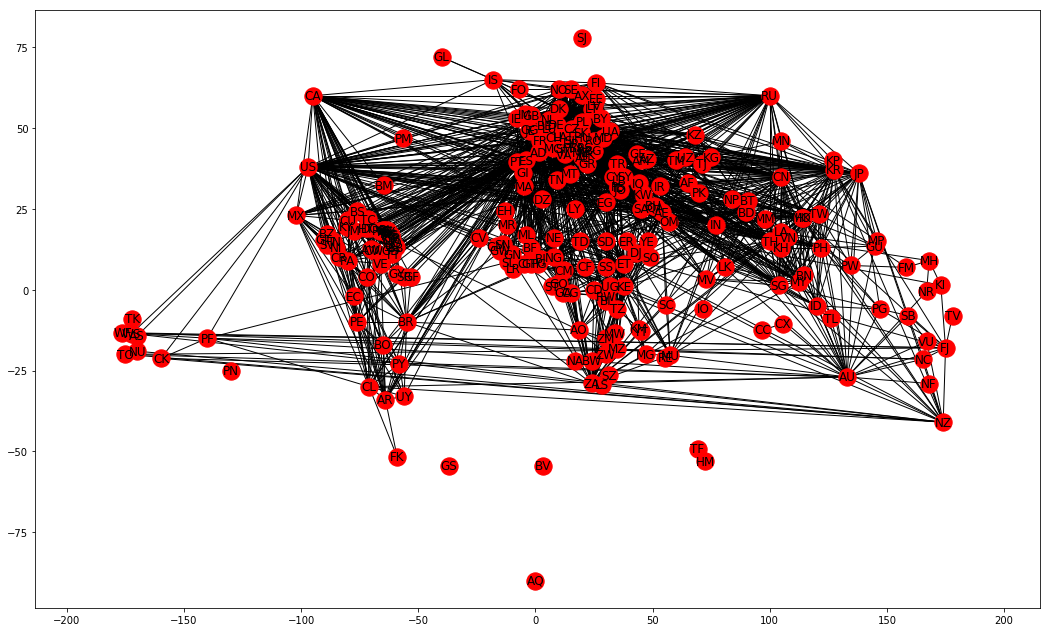

In [32]:
plt.figure(figsize=[18,11])
nx.draw_networkx(RG,pos=c_pos)

In [33]:
RG.edges(data=True)

EdgeDataView([('AW', 'AD', {'weight': 0.18872204877819837}), ('AW', 'CA', {'weight': -0.48948761925184975}), ('AW', 'CO', {'weight': -0.34666301706385183}), ('AW', 'DO', {'weight': -0.38914917933655618}), ('AW', 'NL', {'weight': -0.48295658230511768}), ('AW', 'PA', {'weight': -0.4236464905836238}), ('AW', 'SR', {'weight': 0.51940106003358233}), ('AW', 'US', {'weight': -0.43162344775687145}), ('AW', 'VE', {'weight': 1.2122523217115297}), ('AF', 'AE', {'weight': 1.9887235632471603}), ('AF', 'AZ', {'weight': -0.36475987837633556}), ('AF', 'IN', {'weight': -0.3420044816858217}), ('AF', 'IR', {'weight': -0.064052634011004889}), ('AF', 'KW', {'weight': -0.43028299692153521}), ('AF', 'PK', {'weight': -0.26005660935410846}), ('AF', 'TJ', {'weight': -0.16150449023612459}), ('AF', 'TR', {'weight': -0.48866631619153927}), ('AO', 'AE', {'weight': 0.19686685201108953}), ('AO', 'BR', {'weight': -0.4154258935369145}), ('AO', 'CD', {'weight': 0.91360953650551779}), ('AO', 'CG', {'weight': -0.214206158